In [2]:
#Linear Regression 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv("data/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(df.shape) #Print Rows and Columns
print(df.columns) #Print different columns name
X = df[['area']]   #Since X is Independent varibale 
Y = df['price']    # Y is Dependent variable

X.head()
Y.head()

(545, 13)
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [4]:
#Data Cleaning 
#Step 1 Confirming shapes 
X.shape
Y.shape

(545,)

In [5]:
#Step 2 Checking missing values 
print(df[['area', 'price']].isnull().sum())

area     0
price    0
dtype: int64


In [6]:
#Step 3 Checking Duplicate values 
print("Duplicates ", df[['area' ,'price']].duplicated().sum())

Duplicates  13


In [7]:
#Fixing the Duplicate values  and missing vlues
df = df.drop_duplicates(subset=['area', 'price'])   #Remove Repeated (area, price) rows
df = df.dropna(subset=['area', 'price'])   #Remove missing area or price

In [8]:
#Reassing 
X = df[['area']]
Y = df['price']

In [9]:
#Train - test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

print(f"X Train shape : {X_train.shape} , \n  X test shape : {X_test.shape}  \n y Train shape : {y_train.shape} \n y test shape : {y_test.shape}")

X Train shape : (425, 1) , 
  X test shape : (107, 1)  
 y Train shape : (425,) 
 y test shape : (107,)


In [10]:
#Model Training
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model Intercept : {model.intercept_}")       # It will Give C value
print(f"Model cofficent : {model.coef_}")           #It will Give Slope 

Model Intercept : 2450352.7348542656
Model cofficent : [441.58759734]


In [11]:
#Predict & Evaluate

y_pred = model.predict(X_test)   #Testing the model

mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))   #Finding the mean square error 

score = r2_score(y_test, y_pred)   #Performance Score
print(f"Mean square error : {mean_sq_error}")
print(f"PerFormance score : {score}")


Mean square error : 1883530.179435767
PerFormance score : 0.27698670233105205


c:\Users\Deepanshu Chauhan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


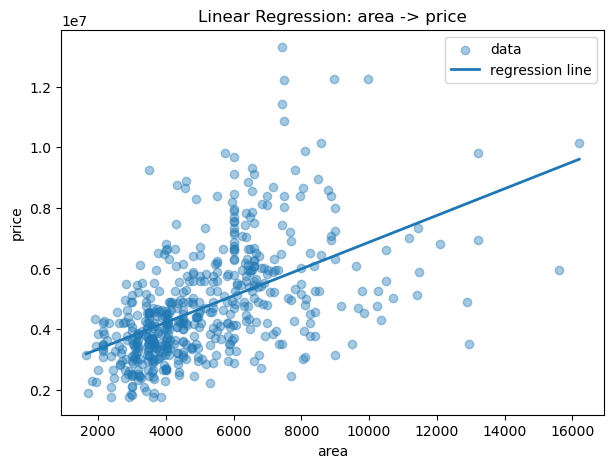

In [12]:
# Plot using full dataset for clarity
plt.figure(figsize=(7,5))
plt.scatter(X, Y, alpha=0.4, label='data')
# create line
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, linewidth=2, label='regression line')
plt.xlabel("area")
plt.ylabel("price")
plt.legend()
plt.title("Linear Regression: area -> price")
plt.show()
